In [15]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [16]:
case_data = pd.read_csv('overall_80K.csv', index_col=0).reset_index(drop=True)

In [17]:
case_data.duplicated().sum()

267

In [18]:
print(len(case_data))
case_data = case_data.drop_duplicates(keep='first').reset_index(drop=True)
print(len(case_data))

81146
80879


In [19]:
non_cyrillic_pattern = r'[^a-zA-Zа-яА-Я .,!?@#№0-9()̄]'

# Функция для поиска всех не-кириллических символов в строке
def find_non_cyrillic(text):
    return re.findall(non_cyrillic_pattern, text)

# Применяем функцию ко всем строкам в Series и объединяем результат в один список
all_non_cyrillic_chars = []
case_data.target.apply(lambda x: all_non_cyrillic_chars.extend(find_non_cyrillic(x)))

# Получаем уникальные символы
unique_non_cyrillic_chars = list(set(all_non_cyrillic_chars))
print(unique_non_cyrillic_chars)

['«', '=', 'Ā', '"', '/', 'ӊ', '%', 'ō', '\uf511', '$', 'ё', '¸', '\uf521', '\xa0', '<', ':', 'ӯ', "'", '+', '—', 'ў', '\xad', '”', 'ӆ', '’', '»', '>', '\uf523', 'Ō', 'ә', 'ū', 'ē', '\uf52d', '–', 'є', 'ā', '\uf519', '\uf50f', '[', ']', '™', ';', 'ӣ', 'Ӈ', '\\', '…', '\uf518', '\uf529', 'Ӣ', '\t', '\uf513', '¬', 'ӈ', 'Ё', 'ӑ', 'ѐ', '_', 'Ē', 'Ӯ', '-']


In [20]:
replace_to_space = ['\t', '\r','\xa0'] + [' ' * i for i in range(20, 2, -1)]
to_delete = ['\\', '\xad']
replace_table = {
    '\uf519': 'о̄',
    '\uf523': 'э̄',
    '\uf50f': 'а̄',
    '\uf511': 'ē',
    '\uf529': 'а̄',
    '\uf518': 'о̄',
    '\uf528': 'Я̄',
    '\uf513': 'ё̄',
    '\uf522': 'Э̄',
    '\uf512': 'Ё̄',
    '\uf50e': 'А̄',
    '\uf521': 'ы̄',
    '\uf52d': 'ю̄',
    'ū': 'ӣ'
}

In [21]:
for symb in replace_to_space:
    case_data.target = case_data.target.apply(lambda x: x.replace(symb, ' '))
    case_data.source = case_data.source.apply(lambda x: x.replace(symb, ' '))
for symb in to_delete:
    case_data.target = case_data.target.apply(lambda x: x.replace(symb, ''))
    case_data.source = case_data.source.apply(lambda x: x.replace(symb, ''))
for old, new in replace_table.items():
    case_data.target = case_data.target.apply(lambda x: x.replace(old, new))
case_data.target = case_data.target.apply(lambda x: x.strip())
case_data.source = case_data.source.apply(lambda x: x.strip())

In [22]:
all_non_cyrillic_chars = []
case_data.target.apply(lambda x: all_non_cyrillic_chars.extend(find_non_cyrillic(x)))

# Получаем уникальные символы
unique_non_cyrillic_chars = list(set(all_non_cyrillic_chars))
print(unique_non_cyrillic_chars)

['«', '=', 'Ā', '"', '/', 'ӊ', '%', 'ō', '$', 'ё', '¸', '<', ':', 'ӯ', "'", '+', '—', 'ў', '”', 'ӆ', '’', '»', '>', 'Ō', 'ә', 'є', 'ē', '–', '™', 'ā', '[', ']', ';', 'ӣ', 'Ӈ', '…', 'Ӣ', '¬', 'ӈ', 'Ё', 'ӑ', 'ѐ', '_', 'Ē', 'Ӯ', '-']


In [23]:
case_data

,target,source
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [24]:
spaces_pattern = r'(?:\b\w\s+){3,}\w\b'

In [25]:
case_data[case_data.target.apply(lambda x: bool(re.findall(spaces_pattern, x)))]

,target,source
46730,"э̄ к в а о̄л ы с , м а̄ н ь а̄гирищ о̄ньщас","У одной женщины была маленькая дочь,"
51883,Ань са̄в хо̄тпа пе̄с йис ма̄т о̄л н э щ е̄ м ья т п а л т хӯл алыщлаӈкве ос во̄раяӈкве воратэ̄гыт.,Сейчас много народу в старых местах живущим людям рыбачить и охотится лезут.
51884,Тот браконьер-ма̄хум са̄в янгуй алмыт ос х о тн у й м а н ы л .,Там браконьеры много лосей добыли и шкуры cняли.
52015,Са̄всыр ма̄ныл ёхталам ма̄щтыр хо̄т п а т т ы в ы ст а в ка сунсуӈкве Силава па̄вылн ялсыт.,С разных мест приезжали мастера выставку смотреть село Силава ходили.
52016,"Ам ще̄мьяӈ та̄гыл са̄лыӈ колт о̄лэ̄гум, хус арыгт е м с а̄ л ы о̄ н ь щ е̄ в .","Я с семьей живу оленеводческом стаде, больше двадцати оленей держали."
...,...,...
78330,"Тот хансым о̄лы, школат соссаӈ ня̄врамыт ма̄гыс х а н и щ т а н н э̄ п а к ы т щ ё̄ п и т а ӈ к в е э̄ р и .","Там написано, школе для местных детей учебники надо готовить."
78335,"ХантыМансийск ӯст о̄лнэ Центр искусств колт лов арыг та̄л рӯпитас, ня̄врамыт м а̄ н ь щ и о с х а н т ы та̄ныт са̄ӈквылтаӈкве ханищтасанэ.","В Городе Ханты-Мансийске больше 10 лет Центр искусств работал, детей манси и ханты учили играть на санквылтапе."
78357,Ты община кӯщаиг Ольга Александровн а Ф о м и ч ё в а о̄л ы .,Начальницей общины является Ольга Александровна Фомичёва.
78359,"То т Р а н д ы м о в ы т , Т а р л и н ы т, В о л д и ныт колта̄глыт хуньт о̄лсыт.","Там когда-то жили семьи Рандымовых, Тарлиных, Волдиных."


In [26]:
case_data

,target,source
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,Те мальчики не выполнят задание в назначенный срок.
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
2,Вит са̄мыл сунсым о̄нтыс,Вода прибывала на глазах
3,"Атаявев, акваг лылынг тагл ворн та тотавев.","Обнюхивает нас, живыми на кладбище уносит."
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",Мы никогда не забудем этого честного человека.
...,...,...
80874,А̄нумн ка̄салахты аквтуп тамле о̄лнэ накыт ма̄хматын ма̄гыс лю̄льсаӈыг сусхатуӈкве вēрмēгыт.,"Мне кажется, что подобные случаи могут вызывать подозрение."
80875,А̄танэ нё̄тнэ̄г юил акван-атманэ.,Волосы аккуратно собраны сзади.
80876,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления меда нет."
80877,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэнк Заппа ёт гастролин минас.","Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа."


In [27]:
case_data.to_csv('cleared_v1.1.csv', index=False)

# Classifier training

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as tts

In [38]:
class_df = pd.concat([
    pd.DataFrame({'text': case_data.target, 'target': 0}),
    pd.DataFrame({'text': case_data.source, 'target': 1})
], axis=0).copy()
class_df

,text,target
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,0
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.",0
2,Вит са̄мыл сунсым о̄нтыс,0
3,"Атаявев, акваг лылынг тагл ворн та тотавев.",0
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",0
...,...,...
80874,"Мне кажется, что подобные случаи могут вызывать подозрение.",1
80875,Волосы аккуратно собраны сзади.,1
80876,"В общем, культуры интенсивного потребления меда нет.",1
80877,"Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",1


In [104]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 3)) # char, (2, 4)

In [105]:
X_vectorized = vectorizer.fit_transform(class_df['text'])

In [106]:
X_vectorized.shape

(161758, 32733)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression(random_state=777, n_jobs=-1, solver='saga')

In [109]:
model.fit(X_vectorized, class_df.target)

LogisticRegression(n_jobs=-1, random_state=777, solver='saga')

In [110]:
class_df['probas'] = model.predict_proba(X_vectorized)[:, 1]
class_df

,text,target,probas,abs_diff
0,Та пыгрисит маим вармаль э̄рнэ поратэт ат вермгыг варункв,0,0.030689,0.033070
1,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.",0,0.000844,0.000616
2,Вит са̄мыл сунсым о̄нтыс,0,0.006905,0.005020
3,"Атаявев, акваг лылынг тагл ворн та тотавев.",0,0.025330,0.029799
4,"Ман ты пӣлтал, веськат хумиюв нэтхуньт ат ёрувлвылув",0,0.014186,0.027720
...,...,...,...,...
80874,"Мне кажется, что подобные случаи могут вызывать подозрение.",1,0.996674,0.005424
80875,Волосы аккуратно собраны сзади.,1,0.916827,0.092218
80876,"В общем, культуры интенсивного потребления меда нет.",1,0.934584,0.098413
80877,"Затем Уэйтс отправился на гастроли с такими музыкантами, как Чарли Рич и Фрэнк Заппа.",1,0.954812,0.039066


In [111]:
class_df['abs_diff'] = np.abs(class_df.target - class_df.probas)

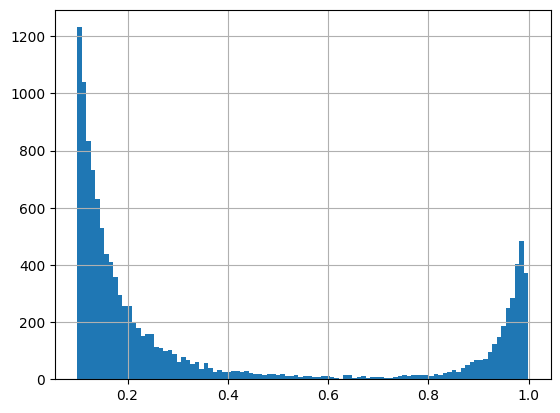

In [112]:
class_df[class_df.abs_diff > 0.1].abs_diff.hist(bins=100)
plt.show()

In [113]:
class_df[(class_df.abs_diff >= 0.75) & (class_df.abs_diff <= 1)].sort_values('abs_diff')

,text,target,probas,abs_diff
73755,Ня̄нь та̄нки ва̄ре̄гыт.,1,0.249656,0.750344
70613,"Тав Будапешт ӯст о̄лы, Лоранд Этвеш нам о̄щнэ университетт научный сотрудникыг рӯпиты.",1,0.249264,0.750736
71669,"Хунь лыпащ щё̄с е̄мты, хӯл алыщлы, во̄- раи.",1,0.248994,0.751006
74217,"Это манси Игорь Вахрушев, Василий Копьев, Дмитрий и Юрий Антисумовый работают, Анатолий Нохов тоже мужчина ханты.",0,0.751147,0.751147
75407,Ваня Яптин урыл Светлана Павловна тох потыртас.,1,0.248559,0.751441
...,...,...,...,...
48132,"Яныг нэ̄тэ кон ква̄лапа̄лыс, ань витуй юв тӯлыгпастэ.",1,0.001138,0.998862
69827,Такви ты урыл тох потыртас: «Ты номтум акваг пуӈкумт о̄лыс… Я̄ӈк на̄тнэ э̄тпос 28 хо̄талт хансуӈкве о̄вылтаслум ос яныг таквс э̄тпос 4 хо̄талт нэ̄пакыг ва̄руӈкве те̄тыслум.,1,0.000962,0.999038
21900,Ма̄н я̄ӈкув минаме лов хо̄талыг ēмтыс.,1,0.000718,0.999282
29808,"Сōль ке нāн вēськат мāхум, мōт сё̄с ам палтум мāнь āпсин тах тотэ̄лын, лāтӈын порсыг ул вос мины",1,0.000620,0.999380


In [34]:
case_data.target.loc[74703]

'– Руслан, ты когда долго дома не бываешь, что твоя семья говорит по этому поводу?    '

In [30]:
for s in case_data.target.loc[78330]:
    print(ord(s))

1058
1086
1090
32
1093
1072
1085
1089
1099
1084
32
1086
772
1083
1099
44
32
1096
1082
1086
1083
1072
1090
32
1089
1086
1089
1089
1072
1224
32
1085
1103
772
1074
1088
1072
1084
1099
1090
32
1084
1072
772
1075
1099
1089
32
1093
32
1072
32
1085
32
1080
32
1097
32
1090
32
1072
32
1085
32
1085
32
1101
772
32
1087
32
1072
32
1082
32
1099
32
1090
32
1097
32
1105
772
32
1087
32
1080
32
1090
32
1072
32
1224
32
1082
32
1074
32
1077
32
1101
772
32
1088
32
1080
32
46


In [10]:
case_data.to_csv('case_data_cleared.csv', index=False)